This project is using a real dataset from Spotify: https://developer.spotify.com/web-api/get-audio-features/.

We're going to analyze what the customer likes and recommend songs for him.

### **Data Analysis and Visualization**

In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm

In [6]:
df = pd.read_csv('spotify.csv', sep=',')

In [7]:
df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [8]:
# Cheking Missing Values
df.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [9]:
# Statistics
df.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


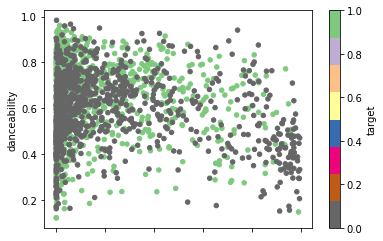

In [10]:
%matplotlib inline
from matplotlib import style
style.use("seaborn-colorblind")
df.plot(x='acousticness', y='danceability', c='target', kind='scatter', colormap='Accent_r')
# Scatter, x = how acoustic is this song and y = how danced is this song, 
# c = class = target -> 0 = Doesn't like it and 1 = Liked it

- We can see that the higher 'danceability' it is less acoustics.

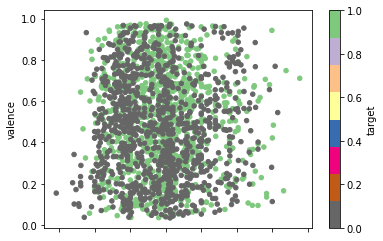

In [11]:
%matplotlib inline
from matplotlib import style
style.use("seaborn-colorblind")
df.plot(x='tempo', y='valence', c='target', kind='scatter' , colormap='Accent_r')
# x = time nad y = describe how happy is this song (next to 1) or sad (next to 0)
# 

- We can see a equality on this distribution. We can't confirm anything on this plot for now.

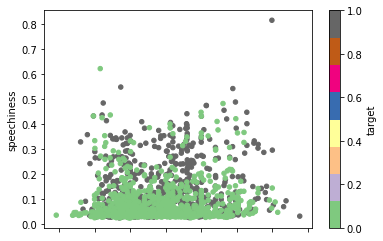

In [12]:
%matplotlib inline
from matplotlib import style
style.use("seaborn-colorblind")
df.plot(x='tempo', y='speechiness', c='target', kind='scatter' , colormap='Accent')
# x = time and y = it's how sung, spoken is this song

- How less is the 'speechiness' (~ 0 to 0.2) less the customer liked it (more green target). From  speechines >= 0.25 we have more gray targets, so, better is the song.



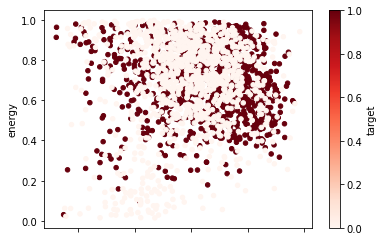

In [13]:
%matplotlib inline
from matplotlib import style
style.use("seaborn-colorblind")
df.plot(x='danceability', y='energy', c='target', kind='scatter' , colormap='Reds')

- How bigger is the energy (> 0.5), more dancing is the song. Our customer prefer danceability songs as we can see on the right side from the plot. 

**Separating Class from Data**

In [14]:
classes = df['target'] # Creating a class using 'target'
df.drop('target', axis=1, inplace=True) # Removing the column target from dataset

In [15]:
df.head(15)

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,Digital Animal,Honey Claws


### **Data Pre-Processing**

In [16]:
# Function to remove all column that you choose
def remove_features(lista_features):
  for i in lista_features:
    df.drop(i, axis=1, inplace=True)
  return 0

In [17]:
# Removing id and song_title columns
remove_features(['id', 'song_title'])

0

In [18]:
# Checking dataset
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


### **Label Encoder**

* Técnica para codificar valores categoricos em numéricos
* Um exemplo seria: a lista de cores: _(‘branco’,’preto’,’amarelo’,’vermelho’,'branco')_
* Após aplicar o LabelEncoder esta seria algo como __(1,2,3,4,1)__
* Para dados que seguem uma ordem você usa o LabelEncoder 
* Since we have a categorical column, we need to transform it to numeric column. We'll use LabelEnconder.

In [19]:
# Catagorical column get with ".info()"
df.artist

0                 Future
1       Childish Gambino
2                 Future
3            Beach House
4            Junior Boys
              ...       
2012      Kill The Noise
2013      Dillon Francis
2014            Rain Man
2015          Twin Moons
2016           Bleachers
Name: artist, Length: 2017, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
# Transform column to numetic type
integrate = LabelEncoder().fit_transform(df['artist'])

In [22]:
# Checking Unique Values
set(integrate)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [23]:
# Creating a new column with numeric artists
df['numeric_artists'] = integrate

In [24]:
# Removing artists
remove_features(['artist'])

0

In [25]:
# Cheking new dataset
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,numeric_artists
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628


### **One Hot Encoding**

* Técnica usada para codificar valores categóricos em númericos.
* Cria uma matriz de presença.
* Resolve o problema __ordenação__ nos dados gerados pelo LabelEncoder.
* Generate a column for each line with 1, and 0 where there is not an artist.
* Recomend when you don't use dataframe with Pandas.

In [26]:
# First we remove the column artist as 26 cell

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
type(df.values)

numpy.ndarray

In [29]:
# Transform in array numpy our dataset and put in a var (df_array)
df_array = df.values

In [30]:
# One Hot Encoder request to send to it the number of rows. Where shape[0] = rows and shape[1] = columns
num_rows = df_array.shape[0]

In [31]:
# Integrate Column Values. All values from all columns until column 13
df_array[:][:,13]

array([ 449.,  222.,  449., ...,  947., 1242.,  132.])

In [32]:
# Transforma a matriz em uma dimensão. Number of elements in 1 dimension matrix
inteiros = integrate.reshape([len(integrate),-1])

In [33]:
# Criar as novas features a partir da matriz de presença
news_features = OneHotEncoder().fit_transform(inteiros)

In [34]:
# Concatena (JOIN) new_features to array
df_array = np.concatenate([df_array, news_features.toarray()], axis=1)

In [35]:
# Check how many rows and columns
df_array.shape

(2017, 1357)

In [36]:
# Transforming to a dataframe pandas
dataf = pd.DataFrame(df_array)

In [37]:
dataf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356
0,0.0102,0.833,204600.0,0.434,0.021900,2.0,0.1650,-8.795,1.0,0.4310,150.062,4.0,0.286,449.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1990,0.743,326933.0,0.359,0.006110,1.0,0.1370,-10.401,1.0,0.0794,160.083,4.0,0.588,222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0344,0.838,185707.0,0.412,0.000234,2.0,0.1590,-7.148,1.0,0.2890,75.044,4.0,0.173,449.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.6040,0.494,199413.0,0.338,0.510000,5.0,0.0922,-15.236,1.0,0.0261,86.468,4.0,0.230,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1800,0.678,392893.0,0.561,0.512000,5.0,0.4390,-11.648,0.0,0.0694,174.004,4.0,0.904,628.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Pandas Get_dummies**

* Cria uma matriz de presença como feito com o One Hot Encoding

In [38]:
# Reading again since we've been changing our dataset
df = pd.read_csv('spotify.csv', sep=',')

In [39]:
# Separating Data from class again
classes = df['target'] # Creating a class using 'target'
df.drop('target', axis=1, inplace=True) # Removing the column target from dataset

In [40]:
# Removing needless columns - PreProcessing Data
def remove_features(lista_features):
  for i in lista_features:
    df.drop(i, axis=1, inplace=True)
  return 0

In [41]:
# Removing id and song_title columns
remove_features(['id', 'song_title'])

0

In [42]:
# We have a categorical column 'artist' yet...
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


In [64]:
# Visualizing features. For each artist name, we will have a prefix 'artist' and a column generated
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness',
       ...
       'artist_alt-J', 'artist_deadmau5', 'artist_for KING & COUNTRY',
       'artist_one sonic society', 'artist_tUnE-yArDs', 'artist_tobyMac',
       'artist_권나무 Kwon Tree', 'artist_도시총각 Dosichonggak',
       'artist_카우칩스 The CowChips', 'artist_플랫핏 Flat Feet'],
      dtype='object', length=1356)

In [45]:
df.dtypes

acousticness                float64
danceability                float64
duration_ms                   int64
energy                      float64
instrumentalness            float64
                             ...   
artist_tobyMac                uint8
artist_권나무 Kwon Tree          uint8
artist_도시총각 Dosichonggak      uint8
artist_카우칩스 The CowChips      uint8
artist_플랫핏 Flat Feet          uint8
Length: 1356, dtype: object

In [46]:
df.isnull().sum()

acousticness                0
danceability                0
duration_ms                 0
energy                      0
instrumentalness            0
                           ..
artist_tobyMac              0
artist_권나무 Kwon Tree        0
artist_도시총각 Dosichonggak    0
artist_카우칩스 The CowChips    0
artist_플랫핏 Flat Feet        0
Length: 1356, dtype: int64

### **Pipeline**

- Normalization and Standartzation

In [47]:
# Importe as bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

**Training SVM**

In [48]:
# Classificator = training with all datas
clf = svm.SVC().fit(df, classes)
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

                                                  Default Configurations

**Cross Validation**

In [49]:
# Função que retorna a acurácia após fazer um validação cruzada (cross validation)
def Acuracia(clf,X,y): # Recive classificator, datas and classes
    resultados = cross_val_predict(clf, X, y, cv=10) # Confguration Values is 10
    return metrics.accuracy_score(y,resultados) # Will gave a accuracy

In [50]:
Acuracia(clf, df, classes)

0.5577590480912246

54% of accuracy to classify what musics our customers liked.

**Evaluation Metrics**

In [51]:
# Criando um pipeline
pip_1 = Pipeline([
    ('scaler',StandardScaler()), #Function aplying Scaler
    ('clf', svm.SVC()) # Training our alghoritm with SVM
])

In [52]:
# Checking steps
pip_1.steps

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False))]

In [53]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_1
Acuracia(pip_1,df,classes)

0.58601883986118

Applying a preprocessor we have a better performance in 58%

In [54]:
# Creating a lot of Pipelines with differents configurations
pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

In [55]:
# Verifying accuracy with pip_2
Acuracia(pip_2,df,classes)

0.7223599405057015

                    Here we have our best score!!

**Testing only with LabelEncoder**

In [74]:
# Reading again
df = pd.read_csv('spotify.csv', sep=',')

In [75]:
# Separating Data from class again
classes = df['target'] # Creating a class using 'target'
df.drop('target', axis=1, inplace=True) # Removing the column target from dataset

In [76]:
# Removing needless columns
def remove_features(lista_features):
  for i in lista_features:
    df.drop(i, axis=1, inplace=True)
  return 0

In [77]:
# Removing id and song_title columns
remove_features(['id', 'song_title'])

0

In [78]:
# We have a categorical column 'artist' yet...
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


In [80]:
# Splying Label Encoder again
from sklearn.preprocessing import LabelEncoder

In [81]:
inteiros = LabelEncoder().fit_transform(df['artist'])

In [82]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


In [83]:
inteiros

array([ 449,  222,  449, ...,  947, 1242,  132])

In [85]:
# New column called 'artist_inteiros' with numeric artists
df['artist_inteiros'] = inteiros

In [87]:
# Removing feature 'artist' with names
remove_features(['artist'])

0

In [88]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628


In [89]:
# Aplying Pepiline again
# Importe as bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [91]:
# Training SVM.
clf = svm.SVC().fit(df,classes)

In [93]:
Acuracia(clf,df,classes)

0.5582548339117501

In [95]:
# Crieating pip_lines again
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

In [97]:
# Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1'
Acuracia(pip_1,df,classes)

0.7149231531978185

In [98]:
# # Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1'
Acuracia(pip_2,df,classes)

0.6757560733763014

                We used less features, so our algorithm had a better performance

### **Testing Kernels**

In [99]:
# Testing o Kernel RBF
Acuracia(pip_3,df,classes)

0.7149231531978185

In [100]:
# Testing Kernel Poly
Acuracia(pip_4, df, classes)

0.6683192860684184

In [101]:
# Kernel Linear
Acuracia(pip_5,df,classes)

0.6236985622211205

      We had a Kernel RBF with better results. We should try all of them to our dataset

**Overfiting Test**

In [102]:
# Using function train_test_split to separate in training and test: 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, classes, test_size=0.2, random_state=123)

In [103]:
# Scala os dados de treino e teste.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler2 = StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test)

In [104]:
# Training algorithm
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [105]:
# Prediction results.
y_pred  = clf.predict(X_test)

In [106]:
# Accuracy
metrics.accuracy_score(y_test,y_pred)

0.7351485148514851

In [107]:
# Prediction results
y_pred  = clf.predict(X_train)

In [108]:
# Accuracy
metrics.accuracy_score(y_train,y_pred)

0.815251084934904

### **Tunning**

In [109]:
# Importa o utilitário GridSearchCV
from sklearn.model_selection import GridSearchCV

In [112]:
# C values list - Increase random list
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]

# Gamma values list - Increase random list
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [115]:
# Define um dicionário que recebe as listas de parâmetros e valores.
# Our classificator will recive our lists C and gamma
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)
parametros_grid

{'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [117]:
# Objeto Grid recebe parâmetros de Pipeline, e configurações de cross validation
#GridSearchCV(our pipiline with Kernel RBF, dictionay os parameters, cv = cross validation = 10, checking accuracy)
grid = GridSearchCV(pip_3, parametros_grid, cv=10, scoring='accuracy')

In [118]:
grid

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.00

In [120]:
 # Aplying gridsearch passing train and classes fro each parameters.
grid.fit(df,classes)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.00

### **Grid and Scores Values**

In [123]:
# Shows scores by combinations
grid.cv_results_

{'mean_fit_time': array([0.16822743, 0.16655815, 0.16677775, 0.16648052, 0.16811457,
        0.12740374, 0.16638155, 0.1660768 , 0.16679659, 0.1671159 ,
        0.20455387, 0.16284451, 0.16630201, 0.15709078, 0.14960916,
        0.17093866, 0.21687548, 0.17659612, 0.15731807, 0.14279964,
        0.13868361, 0.21146646, 0.22335565, 0.17712054, 0.14771471,
        0.14300892, 0.19548016, 0.19799929, 0.20062988, 0.16656203,
        0.15995679, 0.23394959, 0.41607089, 0.19894352, 0.20152292,
        0.16718891]),
 'mean_score_time': array([0.01594727, 0.01609778, 0.01610413, 0.01619182, 0.01668243,
        0.01438031, 0.01613281, 0.01600325, 0.01595271, 0.01615129,
        0.01728923, 0.01414299, 0.01645923, 0.0152513 , 0.01431048,
        0.0163255 , 0.01689386, 0.0142967 , 0.01514921, 0.0138705 ,
        0.01172476, 0.01607101, 0.0167506 , 0.01431251, 0.01322644,
        0.01149657, 0.01086929, 0.0166995 , 0.01680958, 0.01411405,
        0.01216388, 0.01027262, 0.00988696, 0.01669755, 0.

In [124]:
# Shows bests parameters
grid.best_params_

{'clf__C': 100, 'clf__gamma': 0.01}

In [125]:
# Best accuracy
grid.best_score_

0.720858578395153